In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## Loading Image


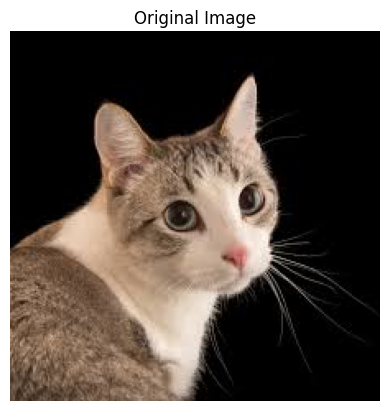

In [7]:
# Load the image
image = cv2.imread('./images.jpeg')

# Convert BGR (OpenCV format) to RGB (Matplotlib format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the original image
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()


##  Reshape Image for K-Means Clustering

In [8]:
# Reshape image into a 2D array of pixels
pixel_values = image.reshape((-1, 3))

# Convert to float for K-Means
pixel_values = np.float32(pixel_values)

# Print shape of the pixel array
print(pixel_values.shape)


(50625, 3)


##  Apply K-Means Clustering

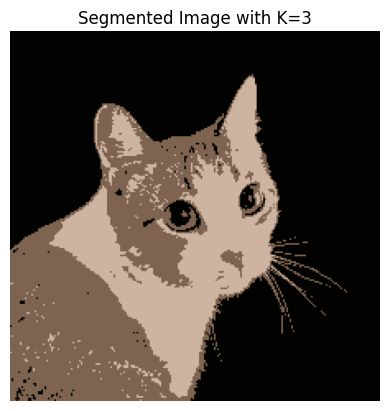

In [9]:
# Define criteria for K-Means (10 iterations or accuracy of 1.0)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Number of clusters (K)
k = 3  # Change this to try different K values
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers back to uint8 (original image format)
centers = np.uint8(centers)

# Map each pixel to its nearest cluster center
segmented_image = centers[labels.flatten()]

# Reshape segmented image to original shape
segmented_image = segmented_image.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_image)
plt.axis('off')
plt.title(f'Segmented Image with K={k}')
plt.show()


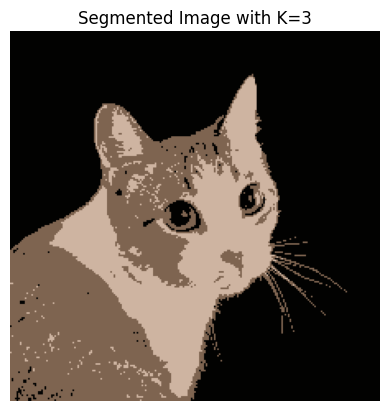

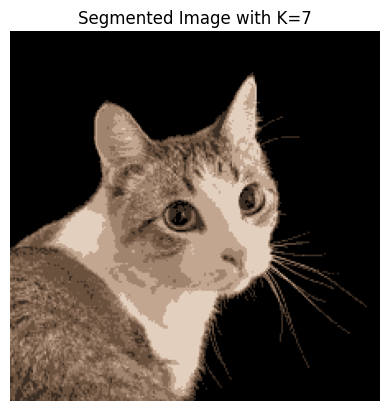

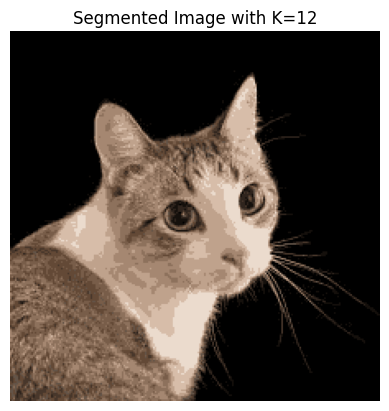

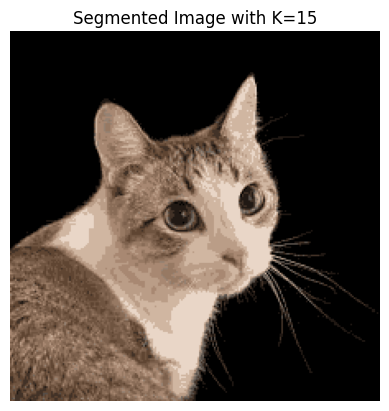

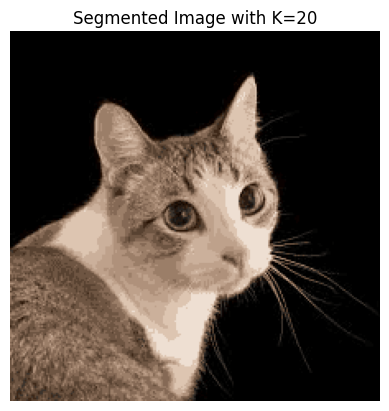

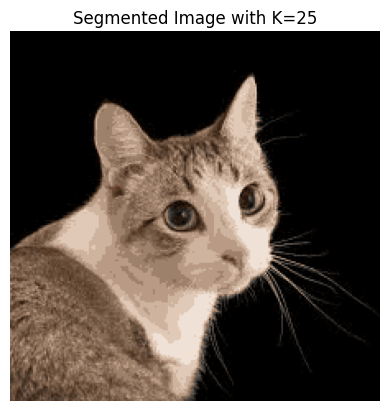

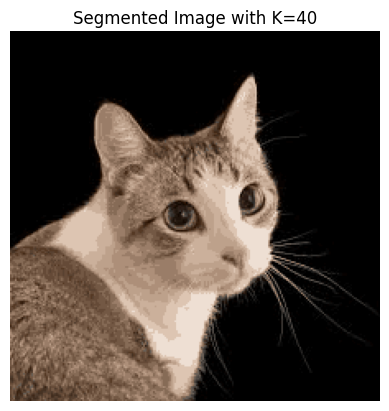

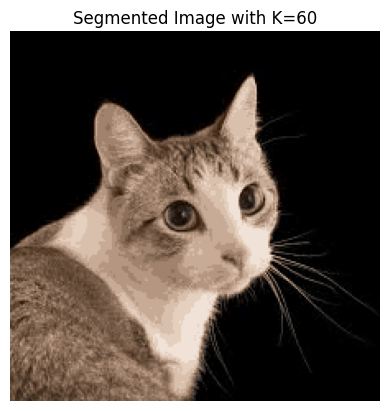

In [10]:
# Try different values of K
for k in [3, 7, 12, 15, 20, 25, 40, 60]:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    # Display the segmented image
    plt.imshow(segmented_image)
    plt.axis('off')
    plt.title(f'Segmented Image with K={k}')
    plt.show()
